# image classification 

aim: predicting mushroom species from image

## get data 

In [191]:
import pathlib
import PIL
import matplotlib

In [ ]:
#import splitfolders

#path = "/Users/laurameyer/code/DSP-Tan/mushroom_learning/raw_data/mushrooms_species"

#splitfolders.ratio(path, output="../raw_data/mushrooms_species_train_test",
#    seed=1337, ratio=(.9, .1), group_prefix=None, move=False)

In [341]:
# data already merged with same extension (jpg vs JPG)
directory_species = "/Users/laurameyer/code/DSP-Tan/mushroom_learning/raw_data/mushrooms_species_train_test/train"

In [342]:
def get_images_directory(directory):
    data_dir = pathlib.Path(directory)
    return data_dir

In [343]:
data_dir = get_images_directory(directory_species)
data_dir

PosixPath('/Users/laurameyer/code/DSP-Tan/mushroom_learning/raw_data/mushrooms_species_train_test/train')

In [344]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3297


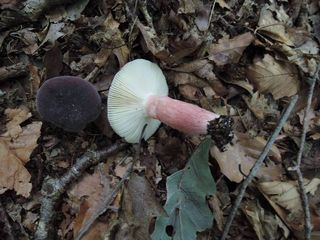

In [345]:
mushrooms = list(data_dir.glob('*/*'))
PIL.Image.open(str(mushrooms[60]))

In [99]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [96]:
img_height = 224
img_width = 224
batch_size = 32

In [346]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

def load_training_data():

    return tf.keras.utils.image_dataset_from_directory(
      data_dir,
      labels='inferred',
      validation_split=0.2,
      subset="training",
      seed=123,
      image_size=(img_height, img_width),
      batch_size=batch_size
    )

train_ds = load_training_data()
type(train_ds)

Found 3297 files belonging to 6 classes.
Using 2638 files for training.


tensorflow.python.data.ops.dataset_ops.BatchDataset

In [347]:
def load_validation_data():
    return tf.keras.utils.image_dataset_from_directory(
      data_dir,
      labels='inferred', 
      validation_split=0.2,
      subset="validation",
      seed=123,
      image_size=(img_height, img_width),
      batch_size=batch_size
    )

val_ds = load_validation_data()
type(train_ds)

Found 3297 files belonging to 6 classes.
Using 659 files for validation.


tensorflow.python.data.ops.dataset_ops.BatchDataset

In [348]:
class_names = train_ds.class_names
print(class_names)

['amanita_muscaria', 'amanita_virosa', 'boletus_edulis', 'cantharellus_cibarius', 'russula_mairei', 'trametes_versicolor']


In [349]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [356]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [357]:
num_classes = len(class_names)
num_classes

6

In [355]:
#model = Sequential([
  #data_augmentation,
  #layers.Rescaling(1./255),
  #layers.Conv2D(16, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  #layers.Conv2D(32, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  #layers.Conv2D(64, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  #layers.Dropout(0.2),
  #layers.Flatten(),
  #layers.Dense(128, activation='relu'),
  #layers.Dense(num_classes)
#])

In [351]:
#opt = keras.optimizers.Adam(learning_rate=1e-4)

#model.compile(optimizer=opt,
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #metrics=['accuracy'] )

In [352]:
#model.summary()

In [353]:
#from tensorflow.keras.callbacks import EarlyStopping

#es = EarlyStopping(patience=10, restore_best_weights=True)

#epochs = 20
#history = model.fit(
  #train_ds,
  #validation_data=val_ds,
  #epochs=epochs,
  #callbacks=[es], 
  #verbose=1
#)

# val accuracy: 0.608

In [354]:
#import matplotlib.pyplot as plt

#acc = history.history['accuracy']
#print(acc)
#val_acc = history.history['val_accuracy']
#print(val_acc)

#loss = history.history['loss']
#val_loss = history.history['val_loss']

#epochs_range = range(0,8)
#print(epochs_range)

#plt.figure(figsize=(8, 8))
#plt.subplot(1, 2, 1)
#plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
#plt.legend(loc='lower right')
#plt.title('Training and Validation Accuracy')

#plt.subplot(1, 2, 2)
#plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
#plt.legend(loc='upper right')
#plt.title('Training and Validation Loss')
#plt.show()

In [ ]:
# score to beat: accuracy: 0.6766

## targets and input from val_ds

In [358]:
def get_labels_from_tfdataset(tfdataset, batched=False):

    labels = list(map(lambda x: x[1], tfdataset)) # Get labels 

    if not batched:
        return tf.concat(labels, axis=0) # concat the list of batched labels

    return labels

In [359]:
def get_inputs_from_tfdataset(tfdataset, batched=False):

    labels = list(map(lambda x: x[0], tfdataset)) # Get labels 

    if not batched:
        return tf.concat(labels, axis=0) # concat the list of batched labels

    return labels

## Tranfer Learning with VGG

In [294]:
#from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

In [360]:
val_ds_labels = get_labels_from_tfdataset(val_ds)

In [361]:
val_ds_inputs = get_inputs_from_tfdataset(val_ds)

In [362]:
input_shape = (224, 224, 3)

def load_model():
    
    #model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape, classes=num_classes)
    model = tf.keras.applications.VGG19(weights="imagenet", include_top=False, input_shape=input_shape, classes=num_classes, classifier_activation="softmax")
    
    return model


In [363]:
def set_nontrainable_layers(model):
    
    model.trainable = False
    
    return model

#for layer in vgg_model.layers:
#    layer.trainable = False

In [364]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainables, and add additional trainable layers on top'''
    base_model = set_nontrainable_layers(model)
    dropout_layer = layers.Dropout(0.2)
    flatten_layer = layers.Flatten()
    dense_layer_1 = layers.Dense(50, activation='relu')
    dense_layer_2 = layers.Dense(20, activation='relu')
    prediction_layer = layers.Dense(num_classes, activation='softmax')
    
    model = models.Sequential([
        data_augmentation,
        layers.Rescaling(1./255),
        base_model,
        dropout_layer, 
        flatten_layer,
        dense_layer_1,
        dense_layer_2,
        prediction_layer
    ])
    
    return model

In [365]:
vgg_model = load_model()
vgg_model

In [366]:
vgg_model = add_last_layers(vgg_model)

In [367]:
val_prediction = vgg_model.predict(val_ds_inputs)

In [368]:
val_prediction.shape

(659, 6)

In [369]:
labels = np.argmax(val_prediction, axis=1)

In [370]:
from sklearn import metrics

results = metrics.accuracy_score(val_ds_labels, labels)

In [371]:
results #whaaaat

0.17147192716236723

## fit vgg model 

In [269]:
from tensorflow.keras import optimizers

def build_model(): 
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-4)
    
    model = model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

In [273]:
from tensorflow.keras.callbacks import EarlyStopping

epochs = 30


model = build_model()
#es = EarlyStopping(patience=5, restore_best_weights=True)
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs, 
                    verbose=1,
                    callbacks=[es])

Epoch 1/30
92/92 [==============================] - 961s 10s/step - loss: 2.2905 - accuracy: 0.3865 - val_loss: 1.4882 - val_accuracy: 0.4720
Epoch 2/30
92/92 [==============================] - 894s 10s/step - loss: 1.2739 - accuracy: 0.5671 - val_loss: 1.1614 - val_accuracy: 0.6126
Epoch 3/30
92/92 [==============================] - 870s 9s/step - loss: 0.9688 - accuracy: 0.6626 - val_loss: 1.0526 - val_accuracy: 0.6698
Epoch 4/30
92/92 [==============================] - 868s 9s/step - loss: 0.8406 - accuracy: 0.7157 - val_loss: 1.0053 - val_accuracy: 0.7026
Epoch 5/30
92/92 [==============================] - 866s 9s/step - loss: 0.6965 - accuracy: 0.7614 - val_loss: 0.9592 - val_accuracy: 0.7244
Epoch 6/30
92/92 [==============================] - 863s 9s/step - loss: 0.6146 - accuracy: 0.7955 - val_loss: 0.9885 - val_accuracy: 0.7462
Epoch 7/30
92/92 [==============================] - 866s 9s/step - loss: 0.5465 - accuracy: 0.8197 - val_loss: 0.9451 - val_accuracy: 0.7776
Epoch 8/30


In [274]:
model.save("../our_second_model")

INFO:tensorflow:Assets written to: ../our_second_model/assets


In [275]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

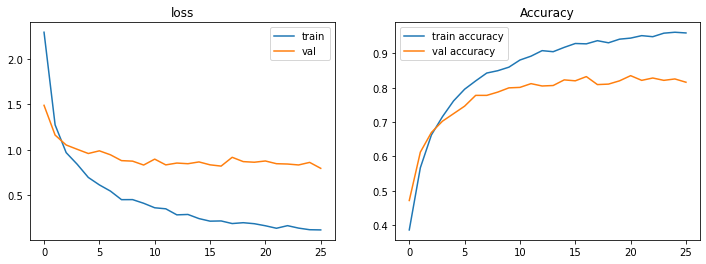

In [276]:
plot_history(history)

In [281]:
res_vgg = model.evaluate(val_ds_inputs, val_ds_labels)

test_accuracy_vgg = res_vgg[-1]


print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

print(f'Chance level: {1./num_classes*100:.1f}%')

23/23 [==============================] - 310s 14s/step - loss: 0.8771 - accuracy: 0.8349
test_accuracy_vgg = 83.0 %
Chance level: 16.7%


## Data Augmentation 

In [372]:
X_train = get_inputs_from_tfdataset(train_ds)
y_train = get_labels_from_tfdataset(train_ds)

In [376]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = False,
    brightness_range = (0.5, 1.),
    zoom_range = (0.3, 1.5))

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)
print(X_train.shape)

model_data_aug = build_model()

train_flow = datagen.flow(X_train, y_train, batch_size=32)
val_flow = datagen.flow(X_val, y_val, batch_size=32)

(2638, 224, 224, 3)


In [375]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

epochs = 1
history_data_aug = model_data_aug.fit(train_flow,
                                      validation_data=val_flow, 
                                      epochs = epochs,
                                      verbose=1,
                                      callbacks=[es])

/Users/laurameyer/.pyenv/versions/3.8.12/envs/mushroom_learning/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


 3/83 [>.............................] - ETA: 13:49 - loss: 1.8108 - accuracy: 0.2292

KeyboardInterrupt: 